In [2]:
import numpy as np
import pandas as pd
import os
import sys
import random
import matplotlib.pyplot as plt
import operator
import seaborn as sns
import pymongo
from pymongo import MongoClient
import time
import re

import _annoncfg_

%matplotlib inline

In [3]:
host = _annoncfg_.DBCFG['ANNONCFG']['host']
port_number = _annoncfg_.DBCFG['ANNONCFG']['port']

In [4]:
# client = MongoClient(host, port_number)
client = MongoClient('10.4.71.69', port_number)

In [5]:
db_names = client.list_database_names()

In [6]:
client.list_database_names()

['PXL-081119_174857',
 'PXL-081119_181309',
 'PXL-081119_184710',
 'PXL-081119_193452',
 'PXL-081119_215023',
 'PXL-081119_225515',
 'PXL-081119_231523',
 'PXL-081119_234430',
 'PXL-091119_011424',
 'PXL-091119_013820',
 'PXL-091119_014238',
 'PXL-091119_032434',
 'PXL-091119_051633',
 'PXL-091119_061417',
 'PXL-091119_062639',
 'PXL-091119_064318',
 'PXL-091119_064443',
 'PXL-091119_065015',
 'PXL-091119_065353',
 'PXL-091119_065953',
 'PXL-091119_070646',
 'PXL-091119_071125',
 'PXL-091119_073030',
 'PXL-091119_073506',
 'PXL-091119_073608',
 'PXL-091119_073716',
 'PXL-131119_190820',
 'PXL-131119_191127',
 'PXL-141119_185550',
 'PXL-151119_175327',
 'PXL-161019_175838',
 'PXL-171019_185702',
 'PXL-281119_140106',
 'PXL-281119_144018',
 'PXL-281119_144432',
 'PXL-281119_154739',
 'PXL-291119_180404',
 'admin',
 'annon',
 'annon_v3',
 'annon_v4',
 'annon_v5',
 'annon_v6',
 'annon_v7',
 'annon_v8',
 'annon_v9',
 'config',
 'local']

In [7]:
# aids = []
# for i in db_names:
#     if re.match(regex, i):
#         aids.append(i)
regex = r".*[\w-]+[\d{6}]_.*[\d{6}]"
aids = [i for i in db_names if re.match(regex, i)]

In [8]:
aids

['PXL-081119_174857',
 'PXL-081119_181309',
 'PXL-081119_184710',
 'PXL-081119_193452',
 'PXL-081119_215023',
 'PXL-081119_225515',
 'PXL-081119_231523',
 'PXL-081119_234430',
 'PXL-091119_011424',
 'PXL-091119_013820',
 'PXL-091119_014238',
 'PXL-091119_032434',
 'PXL-091119_051633',
 'PXL-091119_061417',
 'PXL-091119_062639',
 'PXL-091119_064318',
 'PXL-091119_064443',
 'PXL-091119_065015',
 'PXL-091119_065353',
 'PXL-091119_065953',
 'PXL-091119_070646',
 'PXL-091119_071125',
 'PXL-091119_073030',
 'PXL-091119_073506',
 'PXL-091119_073608',
 'PXL-091119_073716',
 'PXL-131119_190820',
 'PXL-131119_191127',
 'PXL-141119_185550',
 'PXL-151119_175327',
 'PXL-161019_175838',
 'PXL-171019_185702',
 'PXL-281119_140106',
 'PXL-281119_144018',
 'PXL-281119_144432',
 'PXL-281119_154739',
 'PXL-291119_180404']

In [9]:
aids = ['PXL-151119_175327',
 'PXL-281119_140106',
 'PXL-281119_144018',
 'PXL-281119_144432',
 'PXL-281119_154739']
aids_df = pd.DataFrame(columns = ['aids_name', 'labels', 'train_annotations', 
                                  'train_images', 'val_annotations', 'val_images', 
                                  'test_annotations', 'test_images'])
for z in aids:
    db = client[z]
    aids_collection = db['AIDS']
    stat = aids_collection.find()
    stat_j = list(stat)
    df = pd.DataFrame(stat_j)
    aids_name = df['anndb_id'][0]
    labels = df['stats'][0]['train']['labels']
    train_annotations = df['stats'][0]['train']['total_annotations']
    train_images = df['stats'][0]['train']['total_images']
    val_annotations = df['stats'][0]['val']['total_annotations']
    val_images = df['stats'][0]['val']['total_images']
    test_annotations = df['stats'][0]['test']['total_annotations']
    test_images = df['stats'][0]['test']['total_images']
    aids_df = aids_df.append({'aids_name':aids_name, 'labels':labels, 'train_annotations':train_annotations, 
                        'train_images':train_images, 'val_annotations':val_annotations, 
                        'val_images':val_images, 
                        'test_annotations':test_annotations, 'test_images':test_images}, ignore_index=True)

In [10]:
aids_df

,aids_name,labels,train_annotations,train_images,val_annotations,val_images,test_annotations,test_images
0,PXL-151119_175327,"[signage, traffic_light, traffic_sign]",51932,18430,13907,4913,3445,1232
1,PXL-281119_140106,"[signage, traffic_light, traffic_sign]",1800,865,498,231,122,59
2,PXL-281119_144018,"[signage, traffic_light, traffic_sign]",8861,3218,2346,857,591,217
3,PXL-281119_144432,"[signage, traffic_light, traffic_sign]",1039,345,275,92,82,25
4,PXL-281119_154739,"[signage, traffic_light, traffic_sign]",32154,10395,8784,2771,2124,695


In [11]:
csv_path = '/home/saqib/Documents'

In [12]:
aids_df.to_csv('{}/aids_df.csv'.format(csv_path))

In [13]:
train_annot_df = aids_df[['aids_name', 'train_annotations', 'train_images']]

In [14]:
train_annot_df

,aids_name,train_annotations,train_images
0,PXL-151119_175327,51932,18430
1,PXL-281119_140106,1800,865
2,PXL-281119_144018,8861,3218
3,PXL-281119_144432,1039,345
4,PXL-281119_154739,32154,10395


In [38]:
plot_df = pd.melt(train_annot_df, id_vars='aids_name', var_name="Legend", value_name="Total Numbers")
plot_df.head()

,aids_name,Legend,Total Numbers
0,PXL-151119_175327,train_annotations,51932
1,PXL-281119_140106,train_annotations,1800
2,PXL-281119_144018,train_annotations,8861
3,PXL-281119_144432,train_annotations,1039
4,PXL-281119_154739,train_annotations,32154


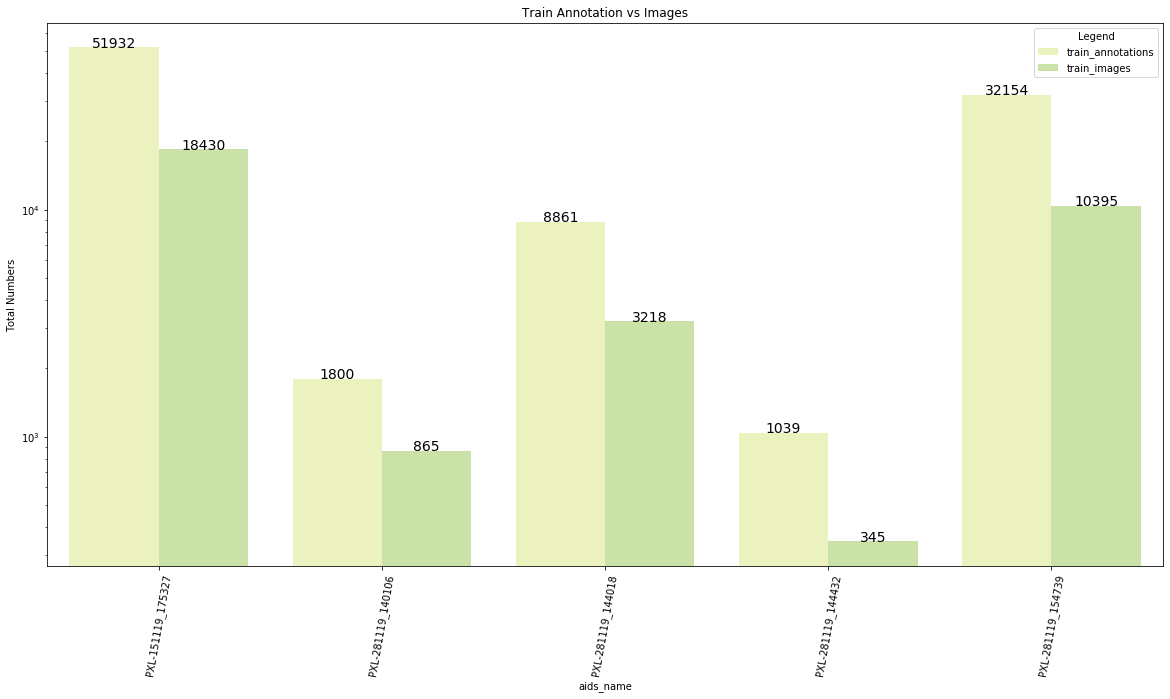

In [39]:
sns.set_palette("YlGn")
plt.figure(figsize=(20,10))
sns.barplot(x='aids_name', y = 'Total Numbers', hue='Legend', data =plot_df)
plt.xticks(rotation=80)
plt.yscale("log")
plt.title("Train Annotation vs Images")
for i in range(len(train_annot_df)):
    m = train_annot_df['train_annotations'][i]
    n = train_annot_df['train_images'][i]
    plt.text(x = i-0.2 , y = m, s = m, size=14, rotation=0, horizontalalignment='center')
    plt.text(x = i+0.2 , y = n, s = n, size=14, rotation=0, horizontalalignment='center')

plt.savefig('{}/train'.format(csv_path), dpi=100, bbox_inches='tight')

plt.show()

In [40]:
val_annot_df = aids_df[['aids_name', 'val_annotations', 'val_images']]
plot_df = pd.melt(val_annot_df, id_vars='aids_name', var_name="Legend", value_name="Total Numbers")
# plot_df.head()

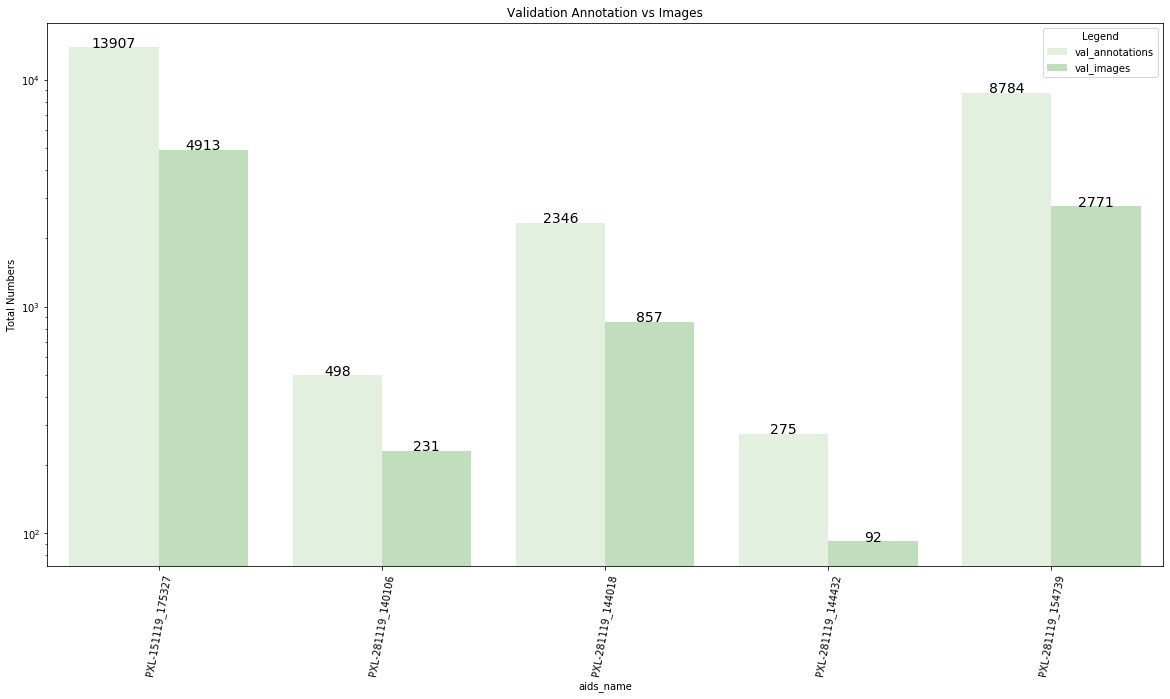

In [41]:
sns.set_palette("Greens")
plt.figure(figsize=(20,10))
sns.barplot(x='aids_name', y = 'Total Numbers', hue='Legend', data =plot_df)
plt.xticks(rotation=80)
plt.yscale("log")
plt.title("Validation Annotation vs Images")
for i in range(len(train_annot_df)):
    m = val_annot_df['val_annotations'][i]
    n = val_annot_df['val_images'][i]
    plt.text(x = i-0.2 , y = m, s = m, size=14, rotation=0, horizontalalignment='center')
    plt.text(x = i+0.2 , y = n, s = n, size=14, rotation=0, horizontalalignment='center')

# plt.savefig('{}/number_of_polygons_vs_bbox'.format(plot_path), dpi=100, bbox_inches='tight')
plt.savefig('{}/val'.format(csv_path), dpi=100, bbox_inches='tight')

plt.show()

In [42]:
test_annot_df = aids_df[['aids_name', 'test_annotations', 'test_images']]
plot_df = pd.melt(test_annot_df, id_vars='aids_name', var_name="Legend", value_name="Total Numbers")
# plot_df.head()

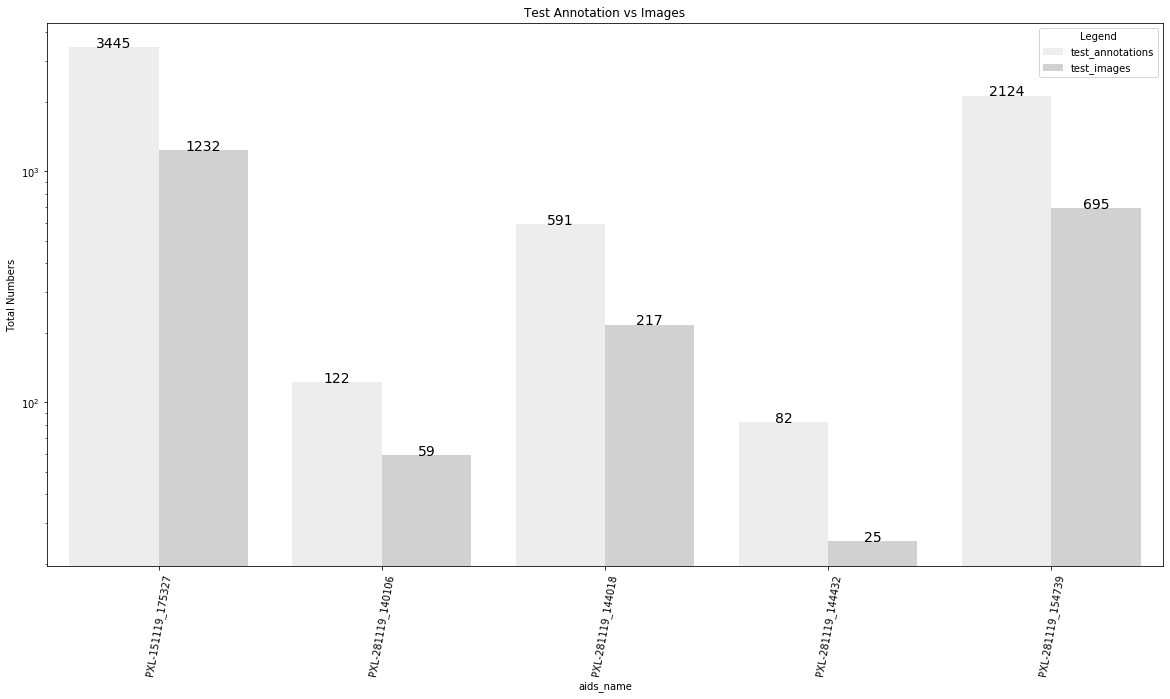

In [43]:
sns.set_palette("Greys")
plt.figure(figsize=(20,10))
sns.barplot(x='aids_name', y = 'Total Numbers', hue='Legend', data =plot_df)
plt.xticks(rotation=80)
plt.yscale("log")
plt.title("Test Annotation vs Images")
for i in range(len(train_annot_df)):
    m = test_annot_df['test_annotations'][i]
    n = test_annot_df['test_images'][i]
    plt.text(x = i-0.2 , y = m, s = m, size=14, rotation=0, horizontalalignment='center')
    plt.text(x = i+0.2 , y = n, s = n, size=14, rotation=0, horizontalalignment='center')

# plt.savefig('{}/number_of_polygons_vs_bbox'.format(plot_path), dpi=100, bbox_inches='tight')
plt.savefig('{}/test'.format(csv_path), dpi=100, bbox_inches='tight')

plt.show()

In [170]:
db = client['PXL-171019_185702']

In [171]:
db.list_collection_names()

['AIDS',
 'EVALUATE',
 'IMAGES',
 'ANNOTATIONS',
 'STATS',
 'PREDICT',
 'CLASSINFO',
 'TRAIN']

In [172]:
aids_collection = db['AIDS']

In [173]:
stat = aids_collection.find()
stat_j = list(stat)

In [174]:
df = pd.DataFrame(stat_j)

In [175]:
df

,_id,created_on,allowed_file_type,allowed_image_type,allowed_video_type,anndb_id,anndb_rel_id,annon_type,class_ids,class_map,...,rel_type,report,return_hmd,splits,stats,summary,test_mode,timestamp,train,train_mode
0,5da86c7467a85d35b3a30c0b,2019-10-17 18:58:20 +05:30,"[.txt, .csv, .yml, .json]","[.pdf, .png, .jpg, .jpeg, .gif]",[.mp4],PXL-171019_185702,None,hmd,None,None,...,aids,[],None,"[train, val, test]","{'train': {'labels': ['flyover_pillar', 'pole'...","{'total_images': 29787, 'total_annotations': 1...",inference,171019_185702,"[train-5217eb25-9964-41a2-a5a4-1737dbcbaf93, t...",training


In [182]:
labels = df['stats'][0]['train']['labels']

In [183]:
labels

['flyover_pillar',
 'pole',
 'signage',
 'street_light',
 'traffic_sign',
 'traffic_sign_frame']

In [120]:
aids_name = df['anndb_id'][0]
labels = df['stats'][0]['train']['classinfo'][0]['name']
train_annotations = df['stats'][0]['train']['total_annotations']
train_images = df['stats'][0]['train']['total_images']
val_annotations = df['stats'][0]['val']['total_annotations']
val_images = df['stats'][0]['val']['total_images']
test_annotations = df['stats'][0]['test']['total_annotations']
test_images = df['stats'][0]['test']['total_images']

In [121]:
aids_df = pd.DataFrame(columns = ['aids_name', 'labels', 'train_annotations', 
                                  'train_images', 'val_annotations', 'val_images', 
                                  'test_annotations', 'test_images'])

In [122]:
aids_df = aids_df.append({'aids_name':aids_name, 'labels':labels, 'train_annotations':train_annotations, 
                        'train_images':train_images, 'val_annotations':val_annotations, 
                        'val_images':val_images, 
                        'test_annotations':test_annotations, 'test_images':test_images}, ignore_index=True)

In [124]:
aids_df

,aids_name,labels,train_annotations,train_images,val_annotations,val_images,test_annotations,test_images
0,PXL-081119_193452,traffic_sign,18860,11878,5056,3167,1273,793


In [125]:
annon_collection = db.ANNOTATIONS

Collection(Database(MongoClient(host=['10.4.71.69:27017'], document_class=dict, tz_aware=False, connect=True), 'PXL-081119_193452'), 'ANNOTATIONS')

In [127]:
annon_m = annon_collection.find()
annon_j = list(annon_m)

In [128]:
annon_df = pd.DataFrame(annon_j)

In [129]:
annon_df

,_id,ant_id,anndb_id,annon_index,annotation_rel_date,annotation_tool,annotator_id,ant_type,bbox,bboxarea,...,img_id,lbl_id,maskarea,modified_on,region_attributes,rel_filename,shape_attributes,dbid,timestamp,subset
0,5dc5760e98e23cd7f6ab7d26,ant-c698e980-51d6-43d4-a034-13953cba0026,161019_144417,0,120619,via205,AT5,rect,"{'ymin': 47, 'xmin': 593, 'ymax': 105, 'xmax':...",2204,...,img-119baa72-9146-40b7-bf4a-679692ea659d,traffic_sign,2204,None,"{'Label': 'traffic_sign', 'ant_id': 'ant-c698e...",images-p1-120619_AT5_via205_120619.json,"{'name': 'rect', 'x': 593, 'y': 47, 'width': 3...",aids-19dac9af-ca17-473b-b611-65dffb7a614e,081119_193452,train
1,5dc5760e98e23cd7f6ab7d27,ant-a81bf6be-5163-472d-a558-fed1913d90c8,161019_144417,3,120619,via205,AT5,rect,"{'ymin': 130, 'xmin': 877, 'ymax': 162, 'xmax'...",352,...,img-119baa72-9146-40b7-bf4a-679692ea659d,traffic_sign,352,None,"{'Label': 'traffic_sign', 'ant_id': 'ant-a81bf...",images-p1-120619_AT5_via205_120619.json,"{'name': 'rect', 'x': 877, 'y': 130, 'width': ...",aids-19dac9af-ca17-473b-b611-65dffb7a614e,081119_193452,train
2,5dc5760e98e23cd7f6ab7d28,ant-8150266b-6166-4ca1-ac80-abf52d850767,161019_144417,0,080719,via205,AT4,polygon,"{'ymin': 139, 'xmin': 627, 'ymax': 187, 'xmax'...",720,...,img-1ac94b4b-0aa0-4a64-9169-c10d797ca049,traffic_sign,540,None,"{'Label': 'traffic_sign', 'ant_id': 'ant-81502...",images-p2-250619_AT4_via205_080719.json,"{'name': 'polygon', 'all_points_x': [639, 636,...",aids-19dac9af-ca17-473b-b611-65dffb7a614e,081119_193452,train
3,5dc5760e98e23cd7f6ab7d29,ant-b3b9034a-70fe-4c04-8c0d-ab3c5fd673c8,161019_144417,2,010719,via205,AT2,polygon,"{'ymin': 409, 'xmin': 1130, 'ymax': 470, 'xmax...",4209,...,img-9157b15f-94af-4268-bb8b-63d1dd3d94a0,traffic_sign,2402,None,"{'Label': 'traffic_sign', 'ant_id': 'ant-b3b90...",images-p2-250619_AT2_via205_010719.json,"{'name': 'polygon', 'all_points_x': [1162, 113...",aids-19dac9af-ca17-473b-b611-65dffb7a614e,081119_193452,train
4,5dc5760e98e23cd7f6ab7d2a,ant-d6e150cb-cdc8-4fbd-b749-c1a5b91f82b5,161019_144417,3,010719,via205,AT2,polygon,"{'ymin': 452, 'xmin': 1303, 'ymax': 489, 'xmax...",1406,...,img-9157b15f-94af-4268-bb8b-63d1dd3d94a0,traffic_sign,1130,None,"{'Label': 'traffic_sign', 'ant_id': 'ant-d6e15...",images-p2-250619_AT2_via205_010719.json,"{'name': 'polygon', 'all_points_x': [1303, 131...",aids-19dac9af-ca17-473b-b611-65dffb7a614e,081119_193452,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25184,5dc5761b98e23cd7f6abef00,ant-d29e1b67-e904-46f3-b6d2-500b6e09b04b,161019_144417,4,250219,via205,AT4,polygon,"{'ymin': 493, 'xmin': 1853, 'ymax': 523, 'xmax...",1140,...,img-89bcf2a5-5b8d-4a18-80b9-6ab6e5b58ab1,traffic_sign,645,None,"{'Object': 'traffic_sign', 'Text': {}, 'Occulu...",images-p2-050219_AT4_via205_250219.json,"{'name': 'polygon', 'all_points_x': [1853, 187...",aids-19dac9af-ca17-473b-b611-65dffb7a614e,081119_193452,test
25185,5dc5761b98e23cd7f6abef01,ant-28a6f2cb-6d0c-425e-9314-1dc15df14ef0,161019_144417,0,120619,via205,AT5,rect,"{'ymin': 295, 'xmin': 1823, 'ymax': 323, 'xmax...",644,...,img-0def06f0-060b-485d-a0bf-a9c3d1c39820,traffic_sign,644,None,"{'Label': 'traffic_sign', 'ant_id': 'ant-28a6f...",images-p1-120619_AT5_via205_120619.json,"{'name': 'rect', 'x': 1823, 'y': 295, 'width':...",aids-19dac9af-ca17-473b-b611-65dffb7a614e,081119_193452,test
25186,5dc5761b98e23cd7f6abef02,ant-ab0bb65c-ab22-4a94-8519-1559c00f005c,161019_144417,0,200519,via205,AT3,polygon,"{'ymin': 145, 'xmin': 107, 'ymax': 225, 'xmax'...",6720,...,img-bd8af692-8dc0-469a-8834-c1a84d28e9ac,traffic_sign,3881,None,"{'Label': 'traffic_sign', 'ant_id': 'ant-ab0bb...",images-p1-060519_AT3_via205_200519.json,"{'name': 'polygon', 'all_points_x': [138, 107,...",aids-19dac9af-ca17-473b-b611-65dffb7a614e,081119_193452,test
25187,5dc5761b98e23cd7f6abef03,ant-e0c78706-78a2-47f7-861c-308227a6464a,161019_144417,0,280619,via205,AT5,polygon,"{'ymin': 242, 'xmin': 893, 'ymax': 266, 'xmax'...",552,...,img

In [130]:
annot_df = annon_df[["img_id","rel_filename", "ant_type", "bboxarea", "maskarea", "lbl_id"]]
annot_df.head()

,img_id,rel_filename,ant_type,bboxarea,maskarea,lbl_id
0,img-119baa72-9146-40b7-bf4a-679692ea659d,images-p1-120619_AT5_via205_120619.json,rect,2204,2204,traffic_sign
1,img-119baa72-9146-40b7-bf4a-679692ea659d,images-p1-120619_AT5_via205_120619.json,rect,352,352,traffic_sign
2,img-1ac94b4b-0aa0-4a64-9169-c10d797ca049,images-p2-250619_AT4_via205_080719.json,polygon,720,540,traffic_sign
3,img-9157b15f-94af-4268-bb8b-63d1dd3d94a0,images-p2-250619_AT2_via205_010719.json,polygon,4209,2402,traffic_sign
4,img-9157b15f-94af-4268-bb8b-63d1dd3d94a0,images-p2-250619_AT2_via205_010719.json,polygon,1406,1130,traffic_sign


In [157]:
a_dict_rect = {}
a_dict_pol = {}
label_arr = annot_df['lbl_id'].unique()
for i in range(len(annot_df)):
    for label in label_arr:
        if label in a_dict_rect.keys():
            if annot_df['ant_type'][i] == 'rect':
                a_dict_rect[label] = a_dict_rect[label] + 1
        if label in a_dict_pol.keys():
            if annon_df['ant_type'][i] =='polygon':
                a_dict_pol[label] = a_dict_pol[label] + 1
        else:
            if annot_df['ant_type'][i] == 'rect':
                a_dict_rect[label] = 1
            else:
                a_dict_pol[label] = 1

In [158]:
a_dict_rect     

{'traffic_sign': 5262}

In [159]:
a_dict_pol

{'traffic_sign': 19919}

In [162]:
images_dict = {}
for label in label_arr:
    images = []
    for i in range(len(annot_df)):
        if annot_df['lbl_id'][i] == label:
            images.append(annot_df['img_id'][i])
    images = set(images)
    images_dict[label] = len(images)

In [163]:
images_dict

{'traffic_sign': 15838}